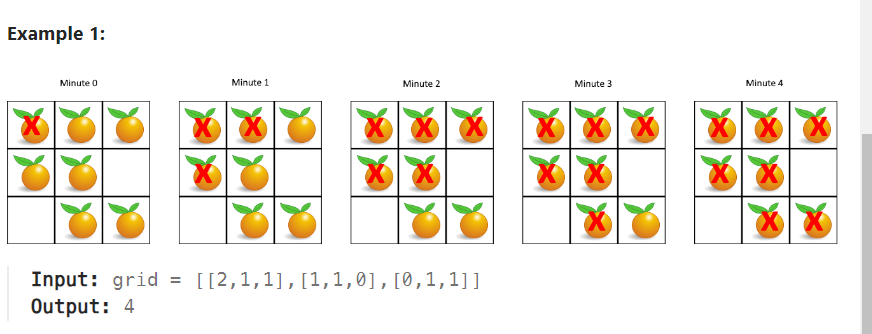

#### bit slower due to max calculation
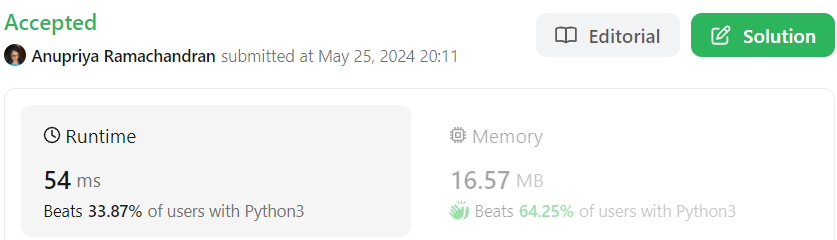

In [2]:
import collections
from typing import List

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        directions = [(1,0), (-1, 0), (0,1), (0, -1)]
        queue = collections.deque()
        freshoranges = 0

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 2:
                    queue.append((i, j, 0))
                elif grid[i][j] == 1:
                    freshoranges += 1
                
        # Basic checks
        if freshoranges == 0:
            return 0

        if not queue:
            return -1


        max_minutes = -1
        while queue:
            x, y, m = queue.popleft()
            max_minutes = max(max_minutes, m)

            for dx, dy in directions:
                i, j = x + dx, y + dy
                if 0 <= i < len(grid) and 0 <= j < len(grid[0]) and grid[i][j] == 1:
                    grid[i][j] = 2
                    freshoranges -= 1
                    queue.append((i, j, m + 1))        

        if freshoranges == 0:
            return max_minutes
        else:
            return -1

#### With comments and removed max calculation
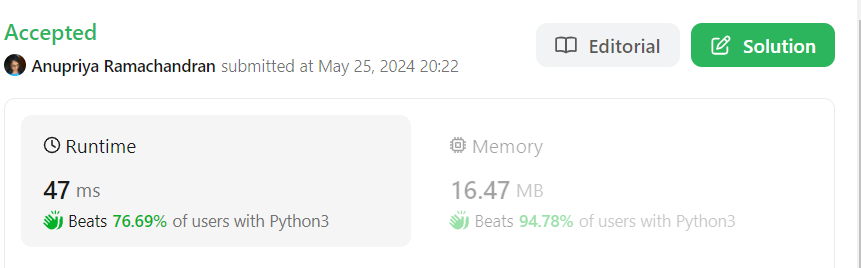

In [3]:
import collections

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        directions = [(1,0), (-1, 0), (0,1), (0, -1)]
        queue = collections.deque()
        freshoranges = 0

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 2:
                    queue.append((i, j, 0))   # first fill all rotten oranges in Queue
                elif grid[i][j] == 1:
                    freshoranges += 1        # and take the count of all fresh oranges
                
        # Basic checks
        if freshoranges == 0:    #basic check is done since no processing needs to be done if this is true
            return 0

        if not queue:    # and if no rotten oranges, nothing can be done   
            return -1    # but this would have been taken care in the 'while queue'  as well. 


        max_minutes = -1  # just taking random small value, could have takem -math.inf also
        while queue:
            x, y, m = queue.popleft()
            # max_minutes = max(max_minutes, m)  # maintaining the max of minutes at any point
                        # since we are taking max, hence started the m from 0 while collecting rotten oranges
                         # since in the next check of while loop, m would have got added by 1, 
                       # in that case we could have returned m as well
            for dx, dy in directions:         
                i, j = x + dx, y + dy
                # CHECK FOR VALID CELL AND IF IS FRESH,# THEN ONLY WE ADD TO QUEUE
                if 0 <= i < len(grid) and 0 <= j < len(grid[0]) and grid[i][j] == 1: 
                    grid[i][j] = 2              # ROTTING THE ORANGE                                       
                    freshoranges -= 1           # AND DECREASING COUNT OF FRESH ORANGES BY 1
                    cur_minute = m + 1
                    queue.append((i, j, cur_minute))  # replaced m +1 with cur_minute, no need to take max
                            

        if freshoranges == 0:
            return cur_minute
        else:
            return -1